In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,}'.format
df = pd.read_excel('C:\Mini-pjt\\fc_data.xlsx')

In [3]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [5]:
# tax_free_amount 삭제
df = df.drop('tax_free_amount', axis = 1)

In [6]:
# type이 ORDER인 행 제거
cond = df[df['type']=='ORDER'].index
df = df.drop(cond)

In [7]:
# type이 TRANSACTION인 행 제거
cond = df[df['type']=='TRANSACTION'].index
df = df.drop(cond)

In [8]:
# state가 PENDING인 행 제거
cond = df[df['state']=='PENDING'].index
df = df.drop(cond)

In [9]:
# state가 CANCELLED인 행 제거
cond = df[df['state']=='CANCELLED'].index
df = df.drop(cond)

In [10]:
# state가 DELETED인 행 제거
cond = df[df['state']=='DELETED'].index
df = df.drop(cond)

In [11]:
df['pg'].value_counts()

INICIS    29225
KAKAO      9705
NAVER      4823
PAYCO      2479
CHAI        155
Name: pg, dtype: int64

In [12]:
df['coupon_title'].value_counts()

[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                     3865
[WELCOME] 온라인 강의 3만원 할인쿠폰                    2143
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                     1791
[WELCOME] 온라인 강의 2만원 할인쿠폰                    1656
[WELCOME] 온라인 강의 1만원 할인쿠폰                    1335
                                             ... 
[무료수강권] RED 검수용_공정필 PM님                         1
[서포터즈 전용] 재무/세무 회계 실무 완성 무료 수강                  1
[서포터즈 전용] Financial Modeling 무료 수강              1
[무료수강권] 부동산 투자_이해진 강사님                          1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍       1
Name: coupon_title, Length: 477, dtype: int64

In [13]:
payment_data = df

In [14]:
payment_data['pg'] = payment_data['pg'].fillna('PG')

In [15]:
payment_data['pg']

2             PG
4             PG
8             PG
10            PG
14            PG
           ...  
105411    INICIS
105412     KAKAO
105413    INICIS
105416    INICIS
105418     NAVER
Name: pg, Length: 56738, dtype: object

In [16]:
payment_data['method'].value_counts()

CARD         38167
POINT         8084
PROMOTION     4733
VBANK         3271
TRANSFER      1207
TRANS          681
ONSITE         586
VOUCHER          5
Name: method, dtype: int64

In [17]:
method_data = df

In [18]:
method_data['method'] = method_data['method'].fillna('')

In [19]:
payment_data['pg'] + ' ' + method_data['method']

2              PG CARD
4              PG CARD
8              PG CARD
10             PG CARD
14             PG CARD
              ...     
105411     INICIS CARD
105412      KAKAO CARD
105413     INICIS CARD
105416    INICIS VBANK
105418     NAVER POINT
Length: 56738, dtype: object

In [20]:
df2 = df

In [21]:
df2['payment_data'] = payment_data['pg'] + ' ' + method_data['method']

In [22]:
df2

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,payment_data
2,970657,"72,297.0","204,246.0",PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,"19,090.0","190,900.0",PG,CARD,NaN,2021-03-04,PG CARD
4,970658,"478,028.0","201,797.0",PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","117,500.0",PG,CARD,PPT/보고서,2019-11-14,PG CARD
8,970669,"478,033.0","203,178.0",PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","116,000.0",PG,CARD,영상 편집,2020-12-02,PG CARD
10,970671,"469,860.0","203,644.0",PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,"263,000.0",PG,CARD,NaN,2020-11-27,PG CARD
14,970676,"478,035.0","203,720.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","111,000.0",PG,CARD,프론트엔드 개발,2021-02-02,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,"669,238.0","204,286.0",PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,"20,000.0","232,000.0",INICIS,CARD,디자인툴,2021-04-23,INICIS CARD
105412,1364976,"384,003.0","203,178.0",PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,"149,000.0",KAKAO,CARD,영상 편집,2020-12-02,KAKAO CARD
105413,1364991,"670,891.0","203,935.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,"20,000.0","179,000.0",INICIS,CARD,백엔드 개발,2021-05-31,INICIS CARD
105416,1364996,"640,697.0","205,365.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,"20,000.0","116,000.0",INICIS,VBANK,영상 편집,2021-06-15,INICIS VBANK


In [23]:
df2['payment_data'].value_counts()

INICIS CARD     26205
KAKAO POINT      6174
PG PROMOTION     4733
KAKAO CARD       3528
NAVER CARD       3350
PG CARD          3245
INICIS VBANK     2735
PAYCO CARD       1839
NAVER POINT      1276
PG TRANSFER      1207
PAYCO POINT       634
PG ONSITE         586
PG VBANK          530
INICIS TRANS      285
NAVER TRANS       197
CHAI TRANS        154
PG TRANS           45
PAYCO VBANK         6
PG VOUCHER          5
KAKAO               3
CHAI                1
Name: payment_data, dtype: int64

In [24]:
how = {
    'id' : np.count_nonzero,
}

In [25]:
df.groupby(['type','state'])

In [26]:
df['method'].value_counts()

CARD         38167
POINT         8084
PROMOTION     4733
VBANK         3271
TRANSFER      1207
TRANS          681
ONSITE         586
VOUCHER          5
                 4
Name: method, dtype: int64

In [27]:
cond = (df['method'] == 'TRANS')
df[cond]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,payment_data
77,970858,"474,806.0","201,797.0",PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 17:32:25,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","117,500.0",PG,TRANS,PPT/보고서,2019-11-14 00:00:00,PG TRANS
136,971051,"477,262.0",NaN,PAYMENT,COMPLETED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 19:02:17,299000,NaN,NaN,"299,000.0",PG,TRANS,NaN,NaT,PG TRANS
259,971417,"183,570.0","202,547.0",PAYMENT,COMPLETED,올인원 패키지 : Financial Modeling,부동산/금융,올인원,2021-03-28 21:26:05,125000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","145,000.0",PG,TRANS,금융/투자 실무,2020-04-17 00:00:00,PG TRANS
274,971449,"183,570.0","203,530.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 반복 업무 자동화,업무 생산성,올인원,2021-03-28 21:31:38,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,"10,000.0","99,000.0",PG,TRANS,업무자동화,NaT,PG TRANS
279,971455,"183,570.0","203,178.0",PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 21:32:32,106000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,"10,000.0","116,000.0",PG,TRANS,영상 편집,2020-12-02 00:00:00,PG TRANS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104797,1360856,"647,344.0","205,761.0",REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 디지털 마케팅,마케팅,올인원,2021-09-23 14:10:02,-198000,NaN,NaN,"228,000.0",INICIS,TRANS,디지털마케팅,2021-08-17 00:00:00,INICIS TRANS
105002,1362858,"142,966.0","202,712.0",PAYMENT,COMPLETED,올인원 패키지 : 통계와 엑셀을 활용한 데이터 분석,업무 생산성,올인원,2021-09-24 00:31:31,144000,NaN,NaN,"144,000.0",CHAI,TRANS,엑셀/VBA,2020-06-17 00:00:00,CHAI TRANS
105006,1362882,"197,897.0","206,331.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능,데이터사이언스,올인원,2021-09-24 01:08:58,211000,NaN,NaN,"211,000.0",INICIS,TRANS,딥러닝/인공지능,2021-07-26 00:00:00,INICIS TRANS
105160,1363676,"670,215.0","204,670.0",PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-09-24 14:23:57,171000,NaN,NaN,"171,000.0",NAVER,TRANS,글쓰기/카피라이팅,2021-06-18 17:00:00,NAVER TRANS


In [28]:
# format 
df.groupby(['type', 'state','category_title', 'subcategory_title', 'format']).agg(how)

id
type    state     category_title subcategory_title format      
PAYMENT COMPLETED 데이터사이언스        데이터분석             RED       64
                                                   올인원     2019
                                                   캠프        15
                                 데이터엔지니어링          RED       79
                                                   올인원       99
...                                                         ...
REFUND  COMPLETED 프로그래밍          백엔드 개발            RED        5
                                                   올인원      256
                                 코딩 입문             올인원       30
                                 프론트엔드 개발          RED       14
                                                   올인원      219

[102 rows x 1 columns]

In [29]:
# 환불이 승인된 데이터프레임
cond_refund = (df['type']== 'REFUND') & (df['state'] == 'COMPLETED')
df[cond_refund]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,payment_data
651,972377,"444,760.0","204,122.0",REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,NaN,NaN,"404,000.0",PG,VBANK,NaN,NaT,PG VBANK
652,972381,"472,666.0","203,178.0",REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,NaN,NaN,"116,000.0",PG,CARD,영상 편집,2020-12-02,PG CARD
666,972409,"447,177.0","203,989.0",REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,NaN,NaN,"89,000.0",PG,CARD,일러스트,2021-02-19,PG CARD
672,972422,"373,915.0","204,264.0",REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,NaN,NaN,"340,000.0",PG,VBANK,NaN,2021-03-08,PG VBANK
675,972436,"456,086.0",NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,NaN,NaN,"299,000.0",PG,CARD,NaN,NaT,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105169,1363708,"600,073.0","206,065.0",REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,NaN,NaN,"179,000.0",NAVER,CARD,백엔드 개발,2021-07-15,NAVER CARD
105175,1363721,"645,911.0",NaN,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,NaN,NaN,"1,400,000.0",INICIS,CARD,NaN,NaT,INICIS CARD
105205,1363934,"506,356.0","206,720.0",REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,NaN,NaN,"259,000.0",NAVER,CARD,영상 편집,2021-08-17,NAVER CARD
105245,1364149,"604,077.0","205,569.0",REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,NaN,NaN,"129,000.0",KAKAO,POINT,엑셀/VBA,2021-08-17,KAKAO POINT


In [30]:
# 결제가 승인된 데이터 프레임
cond_payment = (df['type']== 'PAYMENT') & (df['state'] == 'COMPLETED')
df[cond_payment]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,payment_data
2,970657,"72,297.0","204,246.0",PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,"19,090.0","190,900.0",PG,CARD,NaN,2021-03-04,PG CARD
4,970658,"478,028.0","201,797.0",PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","117,500.0",PG,CARD,PPT/보고서,2019-11-14,PG CARD
8,970669,"478,033.0","203,178.0",PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","116,000.0",PG,CARD,영상 편집,2020-12-02,PG CARD
10,970671,"469,860.0","203,644.0",PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,"263,000.0",PG,CARD,NaN,2020-11-27,PG CARD
14,970676,"478,035.0","203,720.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","111,000.0",PG,CARD,프론트엔드 개발,2021-02-02,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,"669,238.0","204,286.0",PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,"20,000.0","232,000.0",INICIS,CARD,디자인툴,2021-04-23,INICIS CARD
105412,1364976,"384,003.0","203,178.0",PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,"149,000.0",KAKAO,CARD,영상 편집,2020-12-02,KAKAO CARD
105413,1364991,"670,891.0","203,935.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,"20,000.0","179,000.0",INICIS,CARD,백엔드 개발,2021-05-31,INICIS CARD
105416,1364996,"640,697.0","205,365.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,"20,000.0","116,000.0",INICIS,VBANK,영상 편집,2021-06-15,INICIS VBANK


In [31]:
df.groupby(['customer_id', 'course_id']).agg(how)

how4 = {
    'course_id' : np.count_nonzero
}

df.groupby('customer_id').agg(how4)

df.groupby(['customer_id','type','state', 'course_id']).agg(how)

# cond_refund = (df['type'] == 'REFUND')
# df[cond_refund]['id'].unique()

# cond_payment = (df['type'] == 'PAYMENT')
# df[cond_payment]['id'].unique()
cond = df['customer_id']==55928
df[cond]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,payment_data
27606,1052631,"55,928.0",NaN,REFUND,COMPLETED,프로모션 : 학점부터 코테까지 전공생 코딩 무제한 99패스 (5월 프리패스),프로그래밍,올인원,2021-05-04 19:06:08,-299000,NaN,NaN,"299,000.0",KAKAO,POINT,NaN,NaT,KAKAO POINT
55978,1146880,"55,928.0","205,231.0",PAYMENT,COMPLETED,올인원 패키지 : C#으로 하는 인공지능 게임 제작 : 강화학습 에이전트를 사용한 ...,프로그래밍,올인원,2021-06-17 13:30:25,99000,NaN,NaN,"99,000.0",KAKAO,POINT,게임,2021-06-16,KAKAO POINT
55982,1146884,"55,928.0","203,935.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-06-17 13:31:25,99000,NaN,NaN,"99,000.0",KAKAO,POINT,백엔드 개발,2021-05-31,KAKAO POINT
55987,1146894,"55,928.0","202,555.0",PAYMENT,COMPLETED,올인원 패키지 : 리눅스 실전 정복,프로그래밍,올인원,2021-06-17 13:34:51,122500,NaN,NaN,"122,500.0",KAKAO,POINT,DevOps,2020-03-23,KAKAO POINT
56309,1148382,"55,928.0","202,613.0",PAYMENT,COMPLETED,올인원 패키지 : 네트워크와 보안 핵심 요약,프로그래밍,올인원,2021-06-18 01:21:08,96500,NaN,NaN,"96,500.0",KAKAO,POINT,개발자 커리어,2020-05-08,KAKAO POINT
56515,1149461,"55,928.0","202,555.0",REFUND,COMPLETED,올인원 패키지 : 리눅스 실전 정복,프로그래밍,올인원,2021-06-18 15:31:49,-122500,NaN,NaN,"122,500.0",KAKAO,POINT,DevOps,2020-03-23,KAKAO POINT
56516,1149462,"55,928.0","203,720.0",REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-06-18 15:32:12,-116000,NaN,NaN,"116,000.0",KAKAO,POINT,프론트엔드 개발,2021-02-02,KAKAO POINT
56518,1149464,"55,928.0","202,613.0",REFUND,COMPLETED,올인원 패키지 : 네트워크와 보안 핵심 요약,프로그래밍,올인원,2021-06-18 15:32:33,-96500,NaN,NaN,"96,500.0",KAKAO,POINT,개발자 커리어,2020-05-08,KAKAO POINT
56743,1150505,"55,928.0","205,807.0",PAYMENT,COMPLETED,[런칭프로모션_무료클립제공] 올인원 패키지 : 박은종의 객체지향 설계를 위한 디자인...,프로그래밍,올인원,2021-06-19 00:16:36,89000,NaN,NaN,"89,000.0",KAKAO,POINT,NaN,2021-06-18,KAKAO POINT
56775,1150619,"55,928.0","204,373.0",PAYMENT,COMPLETED,초격차 패키지 : 일잘러 필수 스킬 모음.zip,업무 생산성,올인원,2021-06-19 01:55:30,109000,NaN,NaN,"109,000.0",KAKAO,POINT,PPT/보고서,2021-06-04,KAKAO POINT


In [67]:
# format에서 올인원의 환불률
# 올인원 DF
cond_allinone = df['format'] == '올인원'
# 올인원에서 결제승인
df[cond_allinone][cond_payment]
# 올인원에서 환불승인
df[cond_allinone][cond_refund]

# len(df.index)

# 올인원 결제승인 갯수 = 전체 갯수
all_payment = len(df[cond_allinone][cond_payment].index)

# 올인원 환불승인 갯수
all_refund = len(df[cond_allinone][cond_refund].index)


# 올인원 환불률
refund_ratio = all_refund / all_payment * 100

refund_ratio

C:\Users\LSH\AppData\Local\Temp\ipykernel_6232\1554935124.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond_allinone][cond_payment]
C:\Users\LSH\AppData\Local\Temp\ipykernel_6232\1554935124.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond_allinone][cond_refund]
C:\Users\LSH\AppData\Local\Temp\ipykernel_6232\1554935124.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_payment = len(df[cond_allinone][cond_payment].index)
C:\Users\LSH\AppData\Local\Temp\ipykernel_6232\1554935124.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_refund = len(df[cond_allinone][cond_refund].index)


7.052166712669059

In [54]:
format_array = df['format'].unique()
format_array

array(['스쿨 온라인', '올인원', 'RED', '온라인 완주반', 'B2B 온라인', '캠프', '스쿨', 'B2B',
       '이벤트', '하루10분컷', '아카이브', '관리', '온라인', nan, 'MBA', 'B2G'],
      dtype=object)

In [61]:
for i in format_array:
    print(i, type(i))

스쿨 온라인 <class 'str'>
올인원 <class 'str'>
RED <class 'str'>
온라인 완주반 <class 'str'>
B2B 온라인 <class 'str'>
캠프 <class 'str'>
스쿨 <class 'str'>
B2B <class 'str'>
이벤트 <class 'str'>
하루10분컷 <class 'str'>
아카이브 <class 'str'>
관리 <class 'str'>
온라인 <class 'str'>
nan <class 'float'>
MBA <class 'str'>
B2G <class 'str'>


In [73]:
df['format'].isna().value_counts()

False    56738
Name: format, dtype: int64

In [ ]:
# 환불이 승인된 데이터프레임
cond_refund = (df['type']== 'REFUND') & (df['state'] == 'COMPLETED')
df[cond_refund]

# 결제가 승인된 데이터 프레임
cond_payment = (df['type']== 'PAYMENT') & (df['state'] == 'COMPLETED')
df[cond_payment]

# 결측치 처리 (결측치 1개 존재 : 강의 타이틀에 프로모션이 존재해서 프로모션으로 정함)
df[df['format'].isna()] = '프로모션'

In [81]:
df['format'].value_counts()

올인원        46554
RED         3383
온라인 완주반     1673
하루10분컷      1371
스쿨          1036
B2B 온라인      984
스쿨 온라인       643
B2B          485
B2G          434
이벤트           89
아카이브          35
캠프            25
MBA           23
관리             1
온라인            1
프로모션           1
Name: format, dtype: int64

In [80]:
# format array화
format_array = df['format'].unique()

for i in format_array:
    cond = (df['format'] == i)
    # 결제승인
    df[cond][cond_payment]
    # 환불승인
    df[cond][cond_refund]
    # 결제승인 갯수 = 전체 갯수
    payment = len(df[cond][cond_payment].index)
    # 환불승인 갯수
    refund = len(df[cond][cond_refund].index)
    if refund != 0 and payment != 0:
        refund_ratio = refund / payment * 100
    elif payment == 0:
        refund_ratio = 0
        print(f'{i}의 payment가 0')
    else:
        refund_ratio = 0
        print(f'{i}의 refund가 0')
    refund_ratio = round(refund_ratio, 3)
    print(f'format : "{i}"의 환불률은 {refund_ratio}% 입니다.')


C:\Users\LSH\AppData\Local\Temp\ipykernel_6232\2059967621.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond][cond_payment]
C:\Users\LSH\AppData\Local\Temp\ipykernel_6232\2059967621.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond][cond_refund]
C:\Users\LSH\AppData\Local\Temp\ipykernel_6232\2059967621.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  payment = len(df[cond][cond_payment].index)
C:\Users\LSH\AppData\Local\Temp\ipykernel_6232\2059967621.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  refund = len(df[cond][cond_refund].index)


format : "스쿨 온라인"의 환불률은 6.811% 입니다.
format : "올인원"의 환불률은 7.052% 입니다.
format : "RED"의 환불률은 5.226% 입니다.
format : "온라인 완주반"의 환불률은 22.597% 입니다.
format : "B2B 온라인"의 환불률은 0.716% 입니다.
format : "캠프"의 환불률은 19.048% 입니다.
format : "스쿨"의 환불률은 0.975% 입니다.
format : "B2B"의 환불률은 22.475% 입니다.
format : "이벤트"의 환불률은 8.537% 입니다.
format : "하루10분컷"의 환불률은 2.39% 입니다.
format : "아카이브"의 환불률은 12.903% 입니다.
관리의 refund가 0
format : "관리"의 환불률은 0% 입니다.
온라인의 payment가 0
format : "온라인"의 환불률은 0% 입니다.
프로모션의 refund가 0
format : "프로모션"의 환불률은 0% 입니다.
MBA의 refund가 0
format : "MBA"의 환불률은 0% 입니다.
format : "B2G"의 환불률은 24.355% 입니다.


In [34]:
payment_data['type'].value_counts()

PAYMENT    52916
REFUND      3822
Name: type, dtype: int64

In [35]:
payment_data['state'].value_counts()

COMPLETED    56724
REQUESTED       14
Name: state, dtype: int64

In [36]:
how2 = {
    'id' : np.count_nonzero,
    'sale_price' : np.sum,
    'transaction_amount' : np.sum
}

In [37]:
df.groupby(['type','state']).agg(how2)

id      sale_price  transaction_amount
type    state                                               
PAYMENT COMPLETED  52902 7,990,680,312.0          8642456412
        REQUESTED     14     2,291,500.0             2073700
REFUND  COMPLETED   3822   728,028,560.0          -629922955

In [82]:
how = {
    'transaction_amount' : np.sum
}
df.groupby(['format', 'type']).agg(how)

transaction_amount
format  type                      
B2B     PAYMENT          755932780
        REFUND            -3204990
B2B 온라인 PAYMENT         1232648319
        REFUND            -3880000
B2G     PAYMENT           31846300
        REFUND            -2925000
MBA     PAYMENT            4970000
RED     PAYMENT          509463500
        REFUND           -28031137
관리      PAYMENT             150000
스쿨      PAYMENT           14608693
        REFUND           -15894039
스쿨 온라인  PAYMENT           42034660
        REFUND            -3505528
아카이브    PAYMENT            2181900
        REFUND             -286200
온라인     REFUND             -199000
온라인 완주반 PAYMENT          533331700
        REFUND          -115675640
올인원     PAYMENT         5450692510
        REFUND          -450347477
이벤트     PAYMENT            4844000
        REFUND             -446000
캠프      PAYMENT           23974000
        REFUND            -4902500
프로모션    프로모션                  프로모션
하루10분컷  PAYMENT           27351750
        REFUND             -625444

In [39]:

how3 = {
    'id' : np.count_nonzero
}

df.groupby('customer_id').agg(how3)

,id
customer_id,
46.0,1
47.0,2
79.0,1
96.0,1
152.0,1
...,...
"670,842.0",1
"670,891.0",1
"672,301.0",1


In [40]:
how5 = {
    'transaction_amount' : np.sum,
}
payment_data.groupby(['category_title','state']).agg(how)

id
category_title state           
관리             COMPLETED      1
교육             COMPLETED    932
데이터 사이언스       COMPLETED      5
데이터사이언스        COMPLETED   7352
               REQUESTED      2
디자인            COMPLETED   6174
마케팅            COMPLETED   5077
               REQUESTED      1
부동산/금융         COMPLETED   3012
               REQUESTED      1
비즈니스           COMPLETED     24
업무 생산성         COMPLETED   6968
               REQUESTED      2
영상/3D          COMPLETED   5519
               REQUESTED      3
지식콘텐츠          COMPLETED     23
크리에이티브         COMPLETED    954
               REQUESTED      1
투자/재테크         COMPLETED   1597
파이낸스           COMPLETED     19
프로그래밍          COMPLETED  19063
               REQUESTED      4

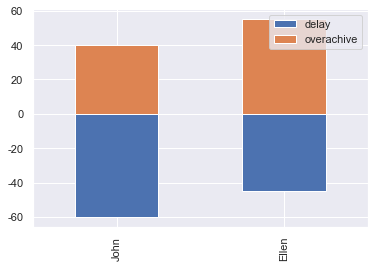

In [83]:
sns.set()

df = pd.DataFrame([(60,40), (45, 55)], columns=['delay', 'overachive'], 
                  index=['John', 'Ellen'])
df['delay'] = -df['delay']
df.plot(kind='bar', stacked=True);

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(df_grahp.index, df_grahp['PAYMENT'], color = '#337AE3', width =0.5)
plt.bar(df_grahp.index, df_grahp['REFUND'], bottom = df_grahp['PAYMENT'], color = '#5E96E9', width =0.5)
# x and y limits
plt.ylim(-450,347,477.0, 5,450,692,510)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# x ticks
plt.xticks(df_grahp['format'] )
# title and legend
legend_label = ['Sales Revenue', 'Interest Revenue']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('My Company - 2020\n', loc='left')
plt.show()

In [89]:
df_group = df.groupby('type')['state']


KeyError: 'type'